<a href="https://colab.research.google.com/github/angshumansinha/7-Days-of-Data-Analysis/blob/main/JEE_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [ ]:
print(min(df.year)," ",max(df.year))

2016   2021


In [ ]:
df.institute_type.unique()# two types IIT and NIT

array(['IIT', 'NIT'], dtype=object)

In [ ]:
df.program_name.unique()

array(['Aerospace Engineering', 'Chemical Engineering', 'Chemistry',
       'Civil Engineering', 'Computer Science and Engineering',
       'Electrical Engineering',
       'Electrical Engineering with M.Tech. in Communications and Signal Processing',
       'Electrical Engineering with M.Tech. in Microelectronics',
       'Energy Engineering with M.Tech. in Energy Systems Engineering',
       'Engineering Physics',
       'Engineering Physics and M.Tech. with specialization in Nano Science',
       'Mechanical Engineering',
       'Mechanical Engineering and M.Tech. in Computer Integrated Manufacturing',
       'Metallurgical Engineering and Materials Science',
       'Metallurgical Engineering and Materials Science with M.Tech. in Ceramics and Composites',
       'Metallurgical Engineering and Materials Science with M.Tech. in Metallurgical Process Engineering',
       'Biochemical Engineering and Biotechnology',
       'Biotechnology and Biochemical Engineering',
       'Electrical 

In [ ]:
df['institute_location']=df.institute_short.str.split("-",expand=True)[1]

In [ ]:
df.institute_location.unique()

array(['Bombay', 'Delhi', 'Kharagpur', 'Kanpur', 'Madras', 'Roorkee',
       'Guwahati', 'Indore', 'Hyderabad', '(BHU) Varanasi', 'Patna',
       '(ISM) Dhanbad', 'Bhubaneswar', 'Mandi', 'Gandhinagar', 'Ropar',
       'Jodhpur', 'Tirupati', 'Bhilai', 'Dharwad', 'Goa', 'Jammu',
       'Palakkad', 'Warangal', 'Tiruchirappalli', 'Uttarakhand', 'Surat',
       'Nagpur', 'Andhra', 'Jalandhar', 'Jaipur', 'Bhopal', 'Allahabad',
       'Calicut', 'Agartala', 'Durgapur', 'Hamirpur', 'Meghalaya',
       'Karnataka', 'Nagaland', 'Puducherry', 'Raipur', 'Sikkim',
       'Arunachal', 'Jamshedpur', 'Kurukshetra', 'Manipur', 'Mizoram',
       'Rourkela', 'Silchar', 'Srinagar'], dtype=object)

In [ ]:
#challenge : Forecast the no of course openings by next years for each institute
#predict the trend of closing and opening ranks for each institute
#perform detailed EDA

In [ ]:
df.pool.unique()

array(['Gender-Neutral', 'Female-Only'], dtype=object)

In [ ]:
df.category.unique()

array(['GEN', 'OBC-NCL', 'SC', 'ST', 'GEN-PWD', 'OBC-NCL-PWD', 'SC-PWD',
       'ST-PWD', 'GEN-EWS', 'GEN-EWS-PWD'], dtype=object)

In [ ]:
df['program_duration']=df.program_duration.str.split(" ",expand=True)[0]

In [ ]:
df.program_duration=df['program_duration'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  64958 non-null  int64 
 1   year                64958 non-null  int64 
 2   institute_type      64958 non-null  object
 3   round_no            64958 non-null  int64 
 4   quota               64958 non-null  object
 5   pool                64958 non-null  object
 6   institute_short     64958 non-null  object
 7   program_name        64958 non-null  object
 8   program_duration    64958 non-null  int64 
 9   degree_short        64958 non-null  object
 10  category            64958 non-null  object
 11  opening_rank        64958 non-null  int64 
 12  closing_rank        64958 non-null  int64 
 13  is_preparatory      64958 non-null  int64 
 14  institute_location  64958 non-null  object
dtypes: int64(7), object(8)
memory usage: 7.4+ MB


In [ ]:
df.round_no.unique() #rounds of counselling

array([6, 7, 1, 2])

In [ ]:
#Total no of course openings throughout the years in all IITs and NITs
"""
# Creates a pivot table dataframe
table = pd.pivot_table(df, values ='A', index =['B', 'C'],
                         columns =['B'], aggfunc = np.sum)
  
"""
df1=pd.pivot_table(df,index='institute_short',columns=['year'],values='program_name',aggfunc='count')

In [ ]:
df1.fillna(0,inplace=True)

In [ ]:
df1=df1.astype('int')
df1

year,2016,2017,2018,2019,2020,2021
institute_short,,,,,,
IIT-(BHU) Varanasi,110,113,160,220,244,1446
IIT-(ISM) Dhanbad,81,85,126,139,155,918
IIT-Bhilai,14,14,22,27,39,234
IIT-Bhubaneswar,45,64,98,112,133,780
IIT-Bombay,84,84,151,164,182,2214
IIT-Delhi,75,79,131,157,189,2322
IIT-Dharwad,14,14,21,26,30,234
IIT-Gandhinagar,28,26,44,50,62,372
IIT-Goa,13,15,22,35,38,228


In [ ]:
df1['Total']=df1.sum(axis='columns')

In [ ]:
df1

year,2016,2017,2018,2019,2020,2021,Total
institute_short,,,,,,,
IIT-(BHU) Varanasi,110,113,160,220,244,1446,2293
IIT-(ISM) Dhanbad,81,85,126,139,155,918,1504
IIT-Bhilai,14,14,22,27,39,234,350
IIT-Bhubaneswar,45,64,98,112,133,780,1232
IIT-Bombay,84,84,151,164,182,2214,2879
IIT-Delhi,75,79,131,157,189,2322,2953
IIT-Dharwad,14,14,21,26,30,234,339
IIT-Gandhinagar,28,26,44,50,62,372,582
IIT-Goa,13,15,22,35,38,228,351


In [ ]:
#top 10 insititutes offering the maximum no of courses
top10=df1.sort_values(by='Total',ascending=False)[0:10]
top10

year,2016,2017,2018,2019,2020,2021,Total
institute_short,,,,,,,
IIT-Kharagpur,177,182,293,335,384,4494,5865
IIT-Delhi,75,79,131,157,189,2322,2953
IIT-Bombay,84,84,151,164,182,2214,2879
NIT-Rourkela,0,0,0,332,359,2178,2869
IIT-Roorkee,73,89,131,167,179,2100,2739
IIT-Madras,99,102,155,135,157,1806,2454
IIT-Kanpur,68,69,109,134,148,1896,2424
IIT-(BHU) Varanasi,110,113,160,220,244,1446,2293
NIT-Raipur,0,0,0,236,251,1566,2053


Text(0.5, 1.0, 'Top 10 institutes offering courses throughout the years')

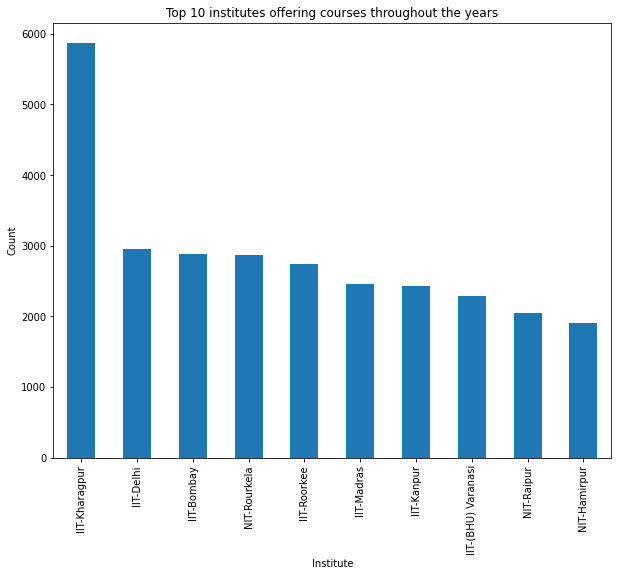

In [ ]:
plot.figure(figsize=(10,8))
top10['Total'].plot(kind='bar')
plot.xlabel("Institute")
plot.ylabel("Count")
plot.title("Top 10 institutes offering courses throughout the years")

In [ ]:
#top 10 courses in which most of the admissions take place or are offered
df3=pd.pivot_table(df,index='program_name',columns=['year'],values='institute_short',aggfunc='count')

In [ ]:
df3.fillna(0,inplace=True)

In [ ]:
df3['Total']=df3.sum(axis='columns')

In [ ]:
df3

year,2016,2017,2018,2019,2020,2021,Total
program_name,,,,,,,
Aerospace Engineering,31.0,28.0,49.0,55.0,61.0,768.0,992.0
Agricultural and Food Engineering,4.0,5.0,7.0,8.0,10.0,120.0,154.0
Agricultural and Food Engineering with M.Tech. in any of the listed specializations,5.0,4.0,8.0,0.0,10.0,120.0,147.0
Agricultural and Food Engineering with M.Tech. in any of the listedspecializations,0.0,0.0,0.0,7.0,0.0,0.0,7.0
Applied Geology,8.0,8.0,11.0,16.0,19.0,174.0,236.0
...,...,...,...,...,...,...,...
Production Engineering,10.0,0.0,0.0,51.0,32.0,222.0,315.0
Production and Industrial Engineering,9.0,10.0,16.0,70.0,77.0,546.0,728.0
Quality Engineering Design and Manufacturing,4.0,5.0,7.0,6.0,8.0,0.0,30.0


In [ ]:
df3.sort_values(by='Total',ascending=False)

year,2016,2017,2018,2019,2020,2021,Total
program_name,,,,,,,
Computer Science and Engineering,189.0,150.0,247.0,839.0,886.0,6114.0,8425.0
Mechanical Engineering,195.0,138.0,206.0,720.0,722.0,4758.0,6739.0
Civil Engineering,150.0,110.0,172.0,684.0,687.0,4578.0,6381.0
Electrical Engineering,125.0,120.0,193.0,546.0,598.0,4182.0,5764.0
Electronics and Communication Engineering,80.0,21.0,35.0,571.0,575.0,3522.0,4804.0
...,...,...,...,...,...,...,...
Manufacturing Science and Engineering with M.Tech. in Industrial andSystems Engineering and Management,0.0,0.0,0.0,7.0,0.0,0.0,7.0
Industrial and Systems Engineering with M.Tech. in Industrial and SystemsEngineering and Management,0.0,0.0,0.0,7.0,0.0,0.0,7.0
Agricultural and Food Engineering with M.Tech. in any of the listedspecializations,0.0,0.0,0.0,7.0,0.0,0.0,7.0


In [ ]:
top10_courses=df3.sort_values(by='Total',ascending=False)[0:10]

In [ ]:
top10_courses

year,2016,2017,2018,2019,2020,2021,Total
program_name,,,,,,,
Computer Science and Engineering,189.0,150.0,247.0,839.0,886.0,6114.0,8425.0
Mechanical Engineering,195.0,138.0,206.0,720.0,722.0,4758.0,6739.0
Civil Engineering,150.0,110.0,172.0,684.0,687.0,4578.0,6381.0
Electrical Engineering,125.0,120.0,193.0,546.0,598.0,4182.0,5764.0
Electronics and Communication Engineering,80.0,21.0,35.0,571.0,575.0,3522.0,4804.0
Chemical Engineering,124.0,83.0,139.0,444.0,467.0,3234.0,4491.0
Metallurgical and Materials Engineering,69.0,29.0,49.0,223.0,227.0,1470.0,2067.0
Engineering Physics,38.0,38.0,58.0,100.0,135.0,1116.0,1485.0
Electrical and Electronics Engineering,43.0,0.0,0.0,165.0,154.0,1008.0,1370.0


Text(0.5, 1.0, 'Top 10 courses throughout the years')

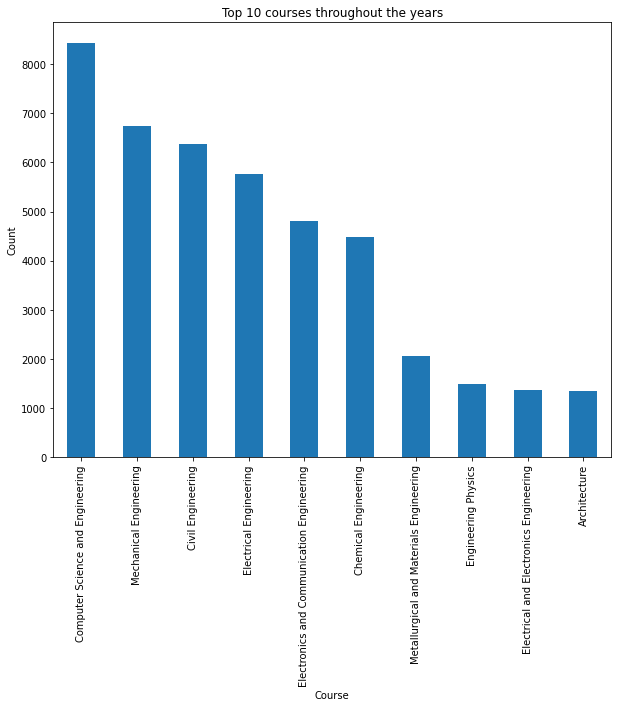

In [ ]:
plot.figure(figsize=(10,8))
top10_courses['Total'].plot(kind='bar')
plot.xlabel("Course")
plot.ylabel("Count")
plot.title("Top 10 courses throughout the years")

In [ ]:
# Year Wise Opening and Closing ranks of top 10 institutes

top10_institutes=top10.index.values

In [ ]:
top10_df=df[df.institute_short.isin(top10_institutes)].reset_index(drop=True)

In [ ]:
top10_df.pivot(index='institute_short',columns='year',values='opening_rank')

ValueError: ignored